# Bitcoin Data Analysis

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Load datasets: Interest (google trends) & Price
- Google searches of term 'bitcoin' worldwide and daily since 2015
- Price action hourly from Gemini

In [84]:
df_interest = pd.read_csv('data/google_trends_bitcoin_2015_2021_daily.csv',header=0)

In [85]:
df_interest['date'] = pd.to_datetime(df_interest['date'])

In [86]:
df_interest.set_index('date',inplace=True)

In [87]:
df_interest.head()

,bitcoin_searches_world
date,
2015-01-01,46.0
2015-01-02,54.0
2015-01-03,56.0
2015-01-04,66.0
2015-01-05,62.0


In [88]:
df_interest.describe()

,bitcoin_searches_world
count,2478.000000
mean,347.108438
std,401.012218
min,34.064516
25%,73.751083
50%,245.724733
75%,397.459756
max,4117.876243


<AxesSubplot:xlabel='date'>

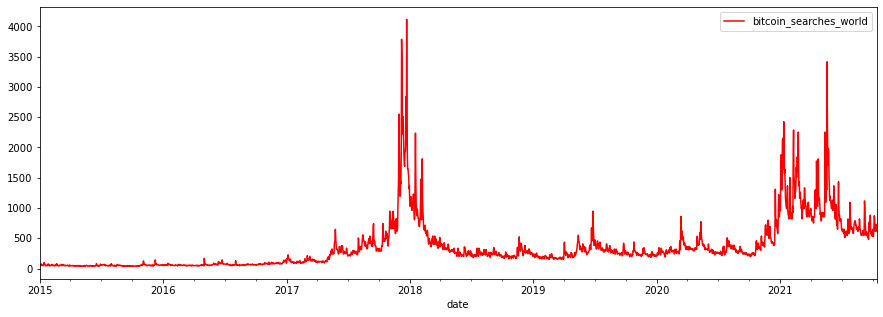

In [89]:
#df_interest.plot(x='date',y='bitcoin_searches_world',figsize=(15,5),color='r')
df_interest.plot(y='bitcoin_searches_world',figsize=(15,5),color='r')

In [90]:
df_price = pd.read_csv('data/Gemini_BTCUSD_2015_2021_hourly.csv',header=0)

In [91]:
df_price['Date'] = pd.to_datetime(df_price['Date'])

In [92]:
df_price.set_index('Date',inplace=True)

In [93]:
df_price.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-10-08 13:00:00,0.00,245.00,0.00,245.00,0.606654
2015-10-08 14:00:00,245.00,245.00,244.50,245.00,4.453649
2015-10-08 15:00:00,245.00,245.00,244.92,244.92,3.016926
2015-10-08 16:00:00,244.92,244.92,244.25,244.25,3.895252
2015-10-08 17:00:00,244.25,244.99,244.02,244.99,3.920632


In [94]:
df_price.describe()

,Open,High,Low,Close,Volume
count,51353.000000,51353.000000,51353.000000,51353.000000,53052.000000
mean,11329.579032,11396.564251,11257.293497,11330.764995,136.272012
std,14931.920498,15025.617945,14830.217792,14933.354612,267.161354
min,0.000000,243.600000,0.000000,243.600000,0.000000
25%,1186.010000,1188.990000,1183.470000,1186.100000,18.450712
50%,6858.430000,6893.000000,6824.610000,6858.710000,56.080521
75%,10587.790000,10636.850000,10525.410000,10587.930000,145.476383
max,66892.380000,66994.720000,66357.600000,66892.380000,8526.751048


<AxesSubplot:xlabel='Date'>

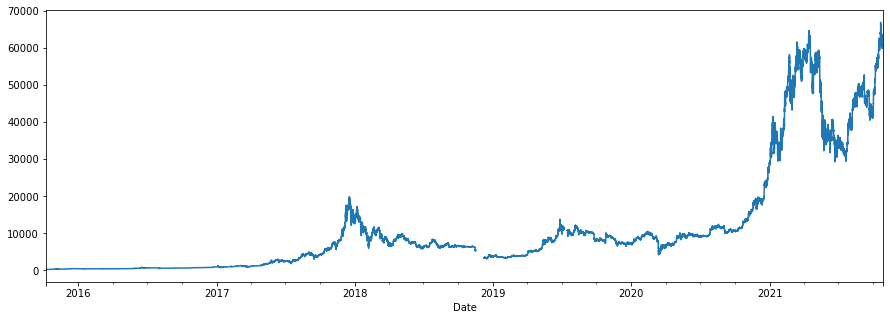

In [95]:
df_price['Close'].plot(figsize=(15,5))

## Preliminary Analysis

In [133]:
# Halving 2016: 2016-07-09
# ATH 2017: 2017-12-17
start = dt.datetime(2016,7,9,0,0,0)
end = dt.datetime(2017,12,17,0,0,0)
#end = dt.datetime(2017,9,15,0,0,0)
# Halving 2020: 2020-05-11
# ATH 2021: ?
#start = dt.datetime(2020,5,11,0,0,0)
#end = dt.datetime(2021,10,27,0,0,0)
duration_days = (end-start).days

In [134]:
duration_days

526

In [135]:
df_price.loc[start:end].shape

(12625, 6)

<AxesSubplot:xlabel='Date'>

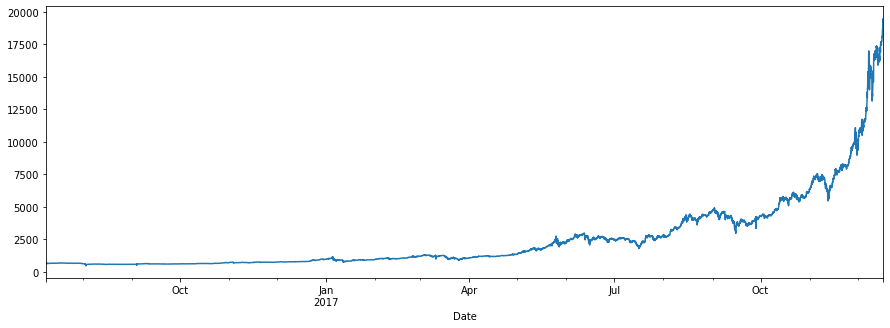

In [136]:
df_price['Low'].loc[start:end].plot(figsize=(15,5))

In [151]:
df_window = df_price.loc[start:end]
n = 100
max_price = df_window['Low'].max()
min_price = df_window['Low'].min()
ref_price = df_window['Low'].iloc[0]
print('min_price = {}, ref_price = {}, max_price = {}'.format(min_price, ref_price, max_price))

min_price = 456.36, ref_price = 661.98, max_price = 19475.87


In [153]:
df_price['Factor'] = df_price['Low']/ref_price
df_window = df_price.loc[start:end]
max_factor = df_window['Factor'].max()
min_factor = df_window['Factor'].min()
step_factor = (max_factor - min_factor) / (n-1)
step_price = (max_price - min_price) / (n-1)
print('min_factor = {}, max_factor = {}, step_factor = {}, step_price = {}'.format(min_factor, max_factor, step_factor, step_price))

min_factor = 0.6893863862956585, max_factor = 29.420632043264145, step_factor = 0.2902146025956413, step_price = 192.1162626262626


In [154]:
price_bins = np.zeros(n)
for i in range(df_window.shape[0]):
    if not (np.isnan(df_window.iloc[i]['Low'])):
        b = np.int(np.floor((df_window.iloc[i]['Low'] - min_price) / step_price))
        price_bins[b] = price_bins[b] + 1

In [155]:
price_bins

array([2.074e+03, 2.060e+03, 1.313e+03, 1.172e+03, 5.000e+02, 1.580e+02,
       1.960e+02, 1.460e+02, 1.510e+02, 3.130e+02, 5.820e+02, 5.290e+02,
       2.130e+02, 2.000e+01, 8.000e+01, 9.400e+01, 1.320e+02, 1.720e+02,
       2.420e+02, 3.350e+02, 2.910e+02, 1.680e+02, 1.010e+02, 7.000e+00,
       1.400e+01, 2.700e+01, 1.340e+02, 1.700e+02, 7.400e+01, 7.400e+01,
       3.900e+01, 4.900e+01, 2.900e+01, 3.400e+01, 8.600e+01, 8.300e+01,
       4.300e+01, 4.100e+01, 3.100e+01, 5.000e+01, 7.800e+01, 4.000e+00,
       1.100e+01, 1.100e+01, 9.000e+00, 7.000e+00, 1.100e+01, 3.400e+01,
       2.200e+01, 1.600e+01, 9.000e+00, 6.000e+00, 1.100e+01, 1.500e+01,
       2.400e+01, 1.600e+01, 1.300e+01, 1.500e+01, 2.200e+01, 2.000e+00,
       3.000e+00, 4.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+00,
       4.000e+00, 3.000e+00, 2.000e+00, 7.000e+00, 4.000e+00, 4.000e+00,
       4.000e+00, 8.000e+00, 3.000e+00, 1.400e+01, 1.400e+01, 9.000e+00,
       9.000e+00, 4.000e+00, 8.000e+00, 5.000e+00, 

<AxesSubplot:>

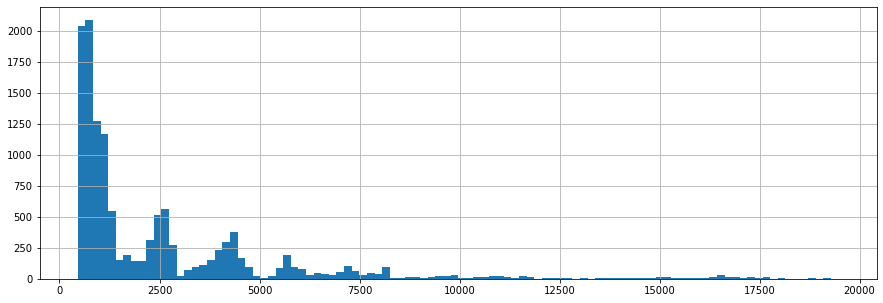

In [156]:
df_window['Low'].hist(bins=100,figsize=(15,5))

<AxesSubplot:>

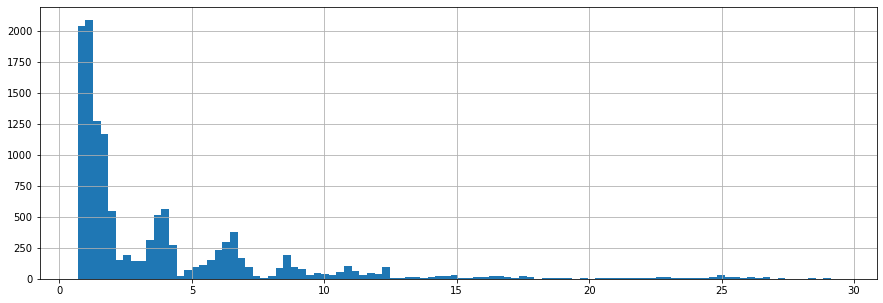

In [157]:
df_window['Factor'].hist(bins=100,figsize=(15,5))

<BarContainer object of 100 artists>

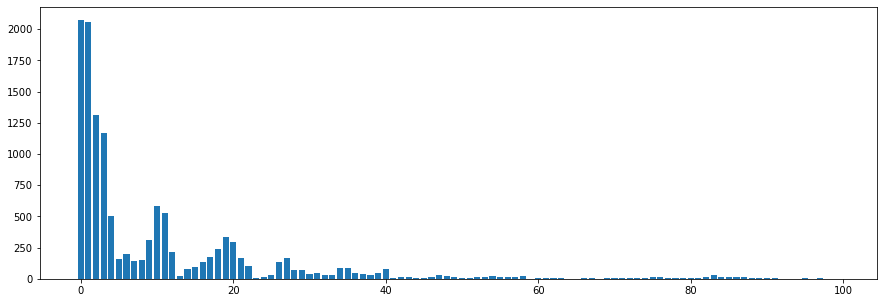

In [143]:
plt.figure(figsize=(15,5))
#plt.bar(x=np.linspace(min_price,max_price,n),height=price_bins)
plt.bar(x=range(n),height=price_bins)

In [144]:
acc_price_bins = np.zeros(n)
l = range(n)
for i in l[::-1]:
    acc_price_bins[i] = price_bins[i:-1].sum()

In [145]:
x = np.linspace(min_price,max_price,n)

<BarContainer object of 100 artists>

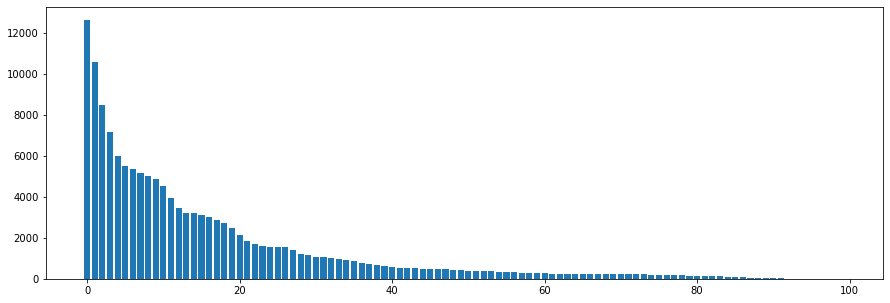

In [146]:
plt.figure(figsize=(15,5))
plt.bar(x=range(n),height=acc_price_bins)
#ax = plt.gca()
#ax.set_xticks(list(x))

In [147]:
acc_price_bins

array([1.2624e+04, 1.0550e+04, 8.4900e+03, 7.1770e+03, 6.0050e+03,
       5.5050e+03, 5.3470e+03, 5.1510e+03, 5.0050e+03, 4.8540e+03,
       4.5410e+03, 3.9590e+03, 3.4300e+03, 3.2170e+03, 3.1970e+03,
       3.1170e+03, 3.0230e+03, 2.8910e+03, 2.7190e+03, 2.4770e+03,
       2.1420e+03, 1.8510e+03, 1.6830e+03, 1.5820e+03, 1.5750e+03,
       1.5610e+03, 1.5340e+03, 1.4000e+03, 1.2300e+03, 1.1560e+03,
       1.0820e+03, 1.0430e+03, 9.9400e+02, 9.6500e+02, 9.3100e+02,
       8.4500e+02, 7.6200e+02, 7.1900e+02, 6.7800e+02, 6.4700e+02,
       5.9700e+02, 5.1900e+02, 5.1500e+02, 5.0400e+02, 4.9300e+02,
       4.8400e+02, 4.7700e+02, 4.6600e+02, 4.3200e+02, 4.1000e+02,
       3.9400e+02, 3.8500e+02, 3.7900e+02, 3.6800e+02, 3.5300e+02,
       3.2900e+02, 3.1300e+02, 3.0000e+02, 2.8500e+02, 2.6300e+02,
       2.6100e+02, 2.5800e+02, 2.5400e+02, 2.5100e+02, 2.4500e+02,
       2.4300e+02, 2.4200e+02, 2.3800e+02, 2.3500e+02, 2.3300e+02,
       2.2600e+02, 2.2200e+02, 2.1800e+02, 2.1400e+02, 2.0600e

In [160]:
acc_price_bins[80:-1]

array([153., 145., 140., 128.,  96.,  78.,  64.,  53.,  40.,  32.,  23.,
        16.,  12.,  10.,   9.,   7.,   4.,   4.,   1.])

In [168]:
# Open High Low Close Volume
df_tmp['Close'] = df_price['Close'].resample(rule='D').last()

(527,)

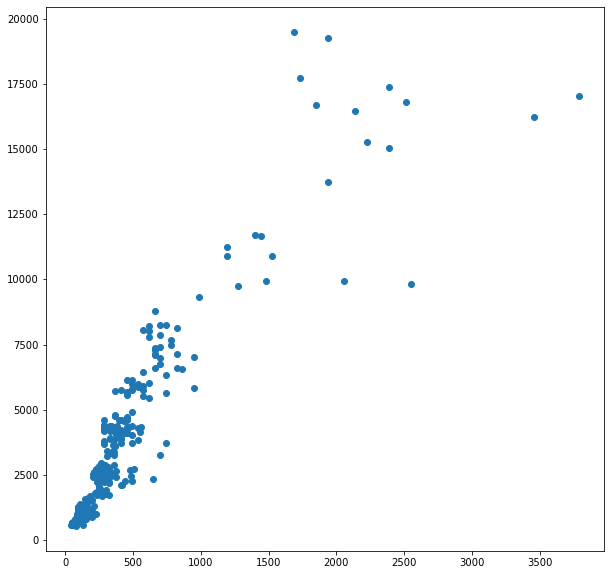

In [175]:
plt.figure(figsize=(10,10))
plt.scatter(x=df_interest['bitcoin_searches_world'].loc[start:end],y=df_tmp['Close'].loc[start:end])